In [1]:
import os
import glob
import xarray as xr
import pyproj
import matplotlib as mpl
import matplotlib.pyplot as plt
import cmocean as cmo
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

In [2]:
#Choose output data to process
run = 'pi02'
years = np.arange(1850,1855)

#Some constants
rho = 1000
months = np.arange(1,13)

#Prepare diagnostic variables
SF   = np.zeros((len(years),len(months)))
SFex = np.zeros((len(years),len(months)))

#Read generic IFS data
ds = xr.open_dataset('../data/ecefiles/areas.nc')
area = ds['A128.srf'].values
ds.close()
ds = xr.load_dataset(f"../data/ecefiles/{run}/ICMGG{run}+{years[0]}01",engine='cfgrib')
lon = ds['longitude'].values
lat = ds['latitude'].values
ds.close()
mask = np.where(lat<-60,1,0)

#Extract diagnostics
for y,yy in enumerate(years):
    for m,mm in enumerate(months):
        fname = f"../data/ecefiles/{run}/ICMGG{run}+{yy}{mm:02d}"
        ds = xr.load_dataset(fname,engine='cfgrib')
        time = ds.time.values
        sf = ds.sf.values
        sd = ds.sd.values
        ds.close()
        
        SF[y,m]   = np.nansum(sf*np.where(sd>0,1,0)*mask*area*rho*1e-12)
        SFex[y,m] = np.nansum(sf*np.where(sd==10,1,0)*mask*area*rho*1e-12)
    print(f'{yy}:  SF: {np.sum(SF[y,:]):.0f} Gt/yr | SFex: {np.sum(SFex[y,:]):.0f} Gt/yr')

1850:  SF: 3646 Gt/yr | SFex: 3004 Gt/yr
1851:  SF: 3346 Gt/yr | SFex: 2719 Gt/yr
1852:  SF: 3440 Gt/yr | SFex: 2841 Gt/yr
1853:  SF: 3476 Gt/yr | SFex: 2885 Gt/yr
1854:  SF: 3798 Gt/yr | SFex: 3204 Gt/yr


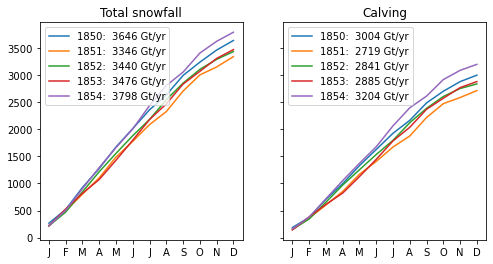

In [3]:
#Merge diagnostics into single variable
var = {}
var[0] = SF
var[1] = SFex

title = ['Total snowfall','Calving','Runoff','Total meltwater (C+R)','Residual (SF-C-R)']

fig,ax = plt.subplots(1,2,figsize=(8,4),sharey=True)

for v in range(2):
    for y,yy in enumerate(years):
        ax[v].plot(np.cumsum(var[v][y,:]),label=f'{yy}:  {np.sum(var[v][y,:]):.0f} Gt/yr')
    ax[v].set_title(title[v])
    ax[v].set_xticks(np.arange(12));
    ax[v].set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D']);
    ax[v].legend(loc='upper left')
    
plt.show()

In [4]:
#Choose output data to process
run = 'pi03'
years = np.arange(1850,1855)

#Some constants
rho = 1000
months = np.arange(1,13)

#Prepare diagnostic variables
SF   = np.zeros((len(years),len(months)))
SFex = np.zeros((len(years),len(months)))

#Read generic IFS data
ds = xr.open_dataset('../data/ecefiles/areas.nc')
area = ds['A128.srf'].values
ds.close()
ds = xr.load_dataset(f"../data/ecefiles/{run}/ICMGG{run}+{years[0]}01",engine='cfgrib')
lon = ds['longitude'].values
lat = ds['latitude'].values
ds.close()
mask = np.where(lat<-60,1,0)

#Extract diagnostics
for y,yy in enumerate(years):
    for m,mm in enumerate(months):
        fname = f"../data/ecefiles/{run}/ICMGG{run}+{yy}{mm:02d}"
        ds = xr.load_dataset(fname,engine='cfgrib')
        time = ds.time.values
        sf = ds.sf.values
        sd = ds.sd.values
        ds.close()
        
        SF[y,m]   = np.nansum(sf*np.where(sd>0,1,0)*mask*area*rho*1e-12)
        SFex[y,m] = np.nansum(sf*np.where(sd==10,1,0)*mask*area*rho*1e-12)
    print(f'{yy}:  SF: {np.sum(SF[y,:]):.0f} Gt/yr | SFex: {np.sum(SFex[y,:]):.0f} Gt/yr')

1850:  SF: 3646 Gt/yr | SFex: 3004 Gt/yr
1851:  SF: 3346 Gt/yr | SFex: 2719 Gt/yr
1852:  SF: 3440 Gt/yr | SFex: 2841 Gt/yr
1853:  SF: 3476 Gt/yr | SFex: 2885 Gt/yr
1854:  SF: 3798 Gt/yr | SFex: 3204 Gt/yr


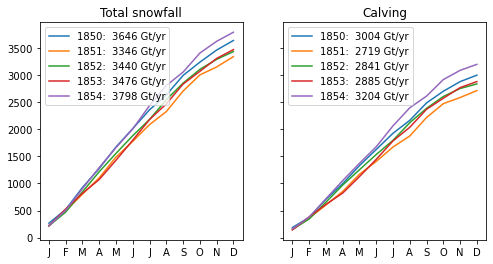

In [5]:
#Merge diagnostics into single variable
var = {}
var[0] = SF
var[1] = SFex

title = ['Total snowfall','Calving','Runoff','Total meltwater (C+R)','Residual (SF-C-R)']

fig,ax = plt.subplots(1,2,figsize=(8,4),sharey=True)

for v in range(2):
    for y,yy in enumerate(years):
        ax[v].plot(np.cumsum(var[v][y,:]),label=f'{yy}:  {np.sum(var[v][y,:]):.0f} Gt/yr')
    ax[v].set_title(title[v])
    ax[v].set_xticks(np.arange(12));
    ax[v].set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D']);
    ax[v].legend(loc='upper left')
    
plt.show()